In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import array

In [97]:
#import natural data with annotations (first dataset)

from Bio import SeqIO                              #crea un array di proteine in sequenza e un array con T,F
proteins_nat_a = []
functionality_nat = []
for seq_record in SeqIO.parse("MSA_nat_with_annotation.faa", "fasta"):
    proteins_nat_a.append(str(seq_record.seq))
    if seq_record.description[-2] == 'u':
        functionality_nat.append('T')
    else:
        functionality_nat.append('F')
functionality_nat1 = functionality_nat.copy()

In [98]:
#import artificial data (second dataset)

from Bio import SeqIO
proteins_art = []
functionality_art = []
for seq_record in SeqIO.parse("MSA_art.faa", "fasta"):
    proteins_art.append(str(seq_record.seq))
    if seq_record.description[-2] == 'u':
        functionality_art.append('T')
    else:
        functionality_art.append('F')
functionality_art1 = functionality_art.copy()

In [99]:
#import artificial data no annotations (third dataset)

from Bio import SeqIO
proteins_nat_no = []
for seq_record in SeqIO.parse("MSA_nat_no_annotation.faa", "fasta"):
    proteins_nat_no.append(str(seq_record.seq))
len(proteins_nat_no)

6311

In [100]:
#ONE HOT ENCODING

def OneHOT(data):
    # https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
    from numpy import array
    from numpy import argmax
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data)
    # binary encode
    onehot_encoder = OneHotEncoder(drop="first",sparse=False,categories='auto')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded1 = onehot_encoder.fit_transform(integer_encoded)
    onehot_encoded = onehot_encoded1
    return onehot_encoded
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

In [101]:
#One-hot encoded version of first dataset
nat_a = np.zeros((1130,1920))
j = 0
long=''.join(proteins_nat_a)
data = [char for char in long]
onehot_nat_a = OneHOT(data)
for i in range(0,len(onehot_nat_a),96):
    nat_a[j,:] = onehot_nat_a[i:i+96].reshape(-1)
    j+=1

In [102]:
#One-hot encoded version of second dataset
art = np.zeros((1003,1920))
j = 0
long=''.join(proteins_art)
data = [char for char in long]
onehot_art = OneHOT(data)
for i in range(0,len(onehot_art),96):
    art[j,:] = onehot_art[i:i+96].reshape(-1)
    j+=1

In [103]:
#One-hot encoded version of third dataset
nat_no = np.zeros((6311,1920))
j = 0
long=''.join(proteins_nat_no)
data = [char for char in long]
data= ['A' if x=='X' else x for x in data]
#data.count('X')
onehot_nat_no = OneHOT(data)
print(len(onehot_nat_no[1]))
for i in range(0,len(onehot_nat_no),96):
    nat_no[j,:] = onehot_nat_no[i:i+96].reshape(-1)
    j+=1

20


In [104]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()    #helps you to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
  
# fitting
scalar.fit(nat_a)                                #fit only the training set
scaled_data_nat_a = scalar.transform(nat_a)      #transform on the training and test set (apply standardization obtained with the training set)
scaled_data_art = scalar.transform(art)
scaled_data_nat_no = scalar.transform(nat_no)

In [105]:
# Importing PCA

#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA               #The new components are just the two main dimensions of variation.
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data_nat_a)
#print(pca.components)
x_pca = pca.transform(scaled_data_nat_a)
y_pca = pca.transform(scaled_data_art)
z_pca = pca.transform(scaled_data_nat_no)
x_pca.shape

(1130, 2)

In [106]:
principalDf_nat_a = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
funct_nat_a = pd.DataFrame(data = functionality_nat, columns = ['functionality'])
finalDf_nat_a = pd.concat([principalDf_nat_a,funct_nat_a], axis = 1)
finalDf_nat_a

,principal component 1,principal component 2,functionality
0,-2.503533,-2.496753,T
1,-0.610155,-1.690277,F
2,0.753780,0.979310,F
3,-2.536598,-2.351428,T
4,-0.524019,-1.488084,F
...,...,...,...
1125,24.007484,4.274152,F
1126,25.014921,3.951893,F
1127,24.205796,3.933024,F
1128,24.342911,3.454889,F


In [107]:
principalDf_art = pd.DataFrame(data = y_pca, columns = ['principal component 1', 'principal component 2'])
funct_art = pd.DataFrame(data = functionality_art, columns = ['functionality'])
finalDf_art = pd.concat([principalDf_art,funct_art], axis = 1)
finalDf_art

,principal component 1,principal component 2,functionality
0,-1.194195,-2.383352,T
1,-0.995329,1.000803,F
2,-2.081793,-3.752762,T
3,-1.469431,-0.380713,T
4,-2.218806,0.580488,T
...,...,...,...
998,-1.493926,-1.160915,T
999,-1.140210,-2.976838,T
1000,-1.744228,-0.039587,T
1001,-0.686681,-2.375752,T


In [108]:
finalDf_nat_no = pd.DataFrame(data = z_pca, columns = ['principal component 1', 'principal component 2'])
finalDf_nat_no

,principal component 1,principal component 2
0,0.109915,0.285752
1,-2.390532,-2.689995
2,-0.694080,-0.745754
3,-0.398108,0.302341
4,-2.369297,-2.942404
...,...,...
6306,-1.721788,-0.584828
6307,-4.680792,15.758384
6308,-4.548255,13.742141
6309,-1.671463,-0.091670


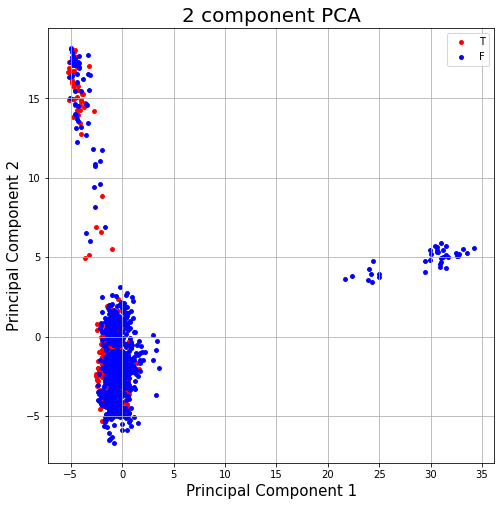

In [109]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
functionalities = ['T', 'F']
colors = ['r', 'b']
for functionality_nat, color in zip(functionalities,colors):
    indicesToKeep = finalDf_nat_a['functionality'] == functionality_nat
    ax.scatter(finalDf_nat_a.loc[indicesToKeep, 'principal component 1']
               , finalDf_nat_a.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
ax.legend(functionalities)
ax.grid()

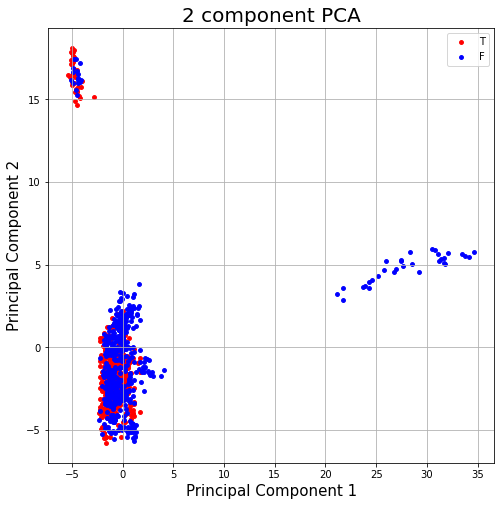

In [110]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
functionalities = ['T', 'F']
colors = ['r', 'b']
for functionality_art, color in zip(functionalities,colors):
    indicesToKeep = finalDf_art['functionality'] == functionality_art
    ax.scatter(finalDf_art.loc[indicesToKeep, 'principal component 1']
               , finalDf_art.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
ax.legend(functionalities)
ax.grid()

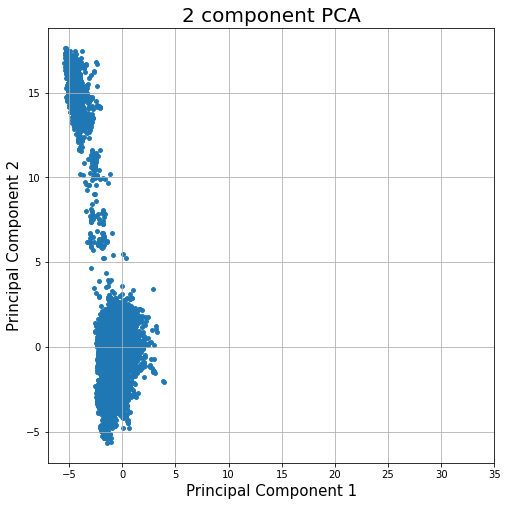

In [111]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.axis(xmin=-7,xmax=35)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#functionalities = ['T', 'F']
#colors = ['r', 'b']
#for functionality_art, color in zip(functionalities,colors):
    #indicesToKeep = finalDf_art['functionality'] == functionality_art
ax.scatter(finalDf_nat_no['principal component 1'], finalDf_nat_no['principal component 2'], s = 15)
#ax.legend(functionalities)
ax.grid()

In [79]:
# Importing PCA

#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA               #The new components are just the two main dimensions of variation.
  
# Let's say, components = 3
pca1 = PCA(n_components = 3)
pca1.fit(scaled_data_nat_a)
#print(pca.components)
x_pca1 = pca1.transform(scaled_data_nat_a)
y_pca1 = pca1.transform(scaled_data_art)
z_pca1 = pca1.transform(scaled_data_nat_no)
x_pca1.shape

(1130, 3)

In [89]:
#functionality_nat1 = functionality_nat
principalDf_nat_a1 = pd.DataFrame(data = x_pca1, columns = ['principal component 1', 'principal component 2','principal component 3'])
funct_nat_a1 = pd.DataFrame(data = functionality_nat1, columns = ['functionality'])
finalDf_nat_a1 = pd.concat([principalDf_nat_a1,funct_nat_a1], axis = 1)
finalDf_nat_a1

,principal component 1,principal component 2,principal component 3,functionality
0,-2.503453,-2.499138,1.458979,T
1,-0.609282,-1.691310,-5.048836,F
2,0.752763,0.983956,0.496989,F
3,-2.536565,-2.354249,1.649556,T
4,-0.523172,-1.488211,-5.022426,F
...,...,...,...,...
1125,24.014379,4.311509,0.621598,F
1126,25.021762,3.976966,0.235452,F
1127,24.212354,3.975400,-0.478801,F
1128,24.349149,3.491463,0.362286,F


In [92]:
principalDf_art1 = pd.DataFrame(data = y_pca1, columns = ['principal component 1', 'principal component 2','principal component 3'])
funct_art1 = pd.DataFrame(data = functionality_art1, columns = ['functionality'])
finalDf_art1 = pd.concat([principalDf_art1,funct_art1], axis = 1)
finalDf_art1

,principal component 1,principal component 2,principal component 3,functionality
0,-1.193361,-2.369377,1.262200,T
1,-0.994507,0.992482,-2.759911,F
2,-2.081678,-3.757186,1.366115,T
3,-1.470655,-0.378807,-4.330373,T
4,-2.222393,0.576591,-3.123647,T
...,...,...,...,...
998,-1.494940,-1.166074,-3.157965,T
999,-1.138562,-2.983533,1.396451,T
1000,-1.743761,-0.006245,-4.310247,T
1001,-0.686384,-2.389348,-1.747188,T


In [112]:
finalDf_nat_no1 = pd.DataFrame(data = z_pca1, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf_nat_no1

,principal component 1,principal component 2,principal component 3
0,0.109313,0.294229,0.566001
1,-2.390533,-2.692236,1.655291
2,-0.696480,-0.743616,-1.696910
3,-0.398849,0.307504,1.253443
4,-2.369086,-2.948230,1.822968
...,...,...,...
6306,-1.722325,-0.585407,-1.528979
6307,-4.680264,15.759212,2.245831
6308,-4.548286,13.743980,2.039498
6309,-1.674615,-0.093172,-2.515323


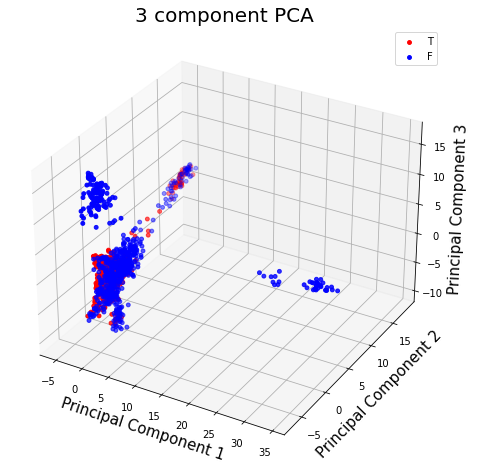

In [113]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
functionalities = ['T', 'F']
colors = ['r', 'b']
for functionality_nat1, color in zip(functionalities,colors):
    indicesToKeep = finalDf_nat_a1['functionality'] == functionality_nat1
    ax.scatter(finalDf_nat_a1.loc[indicesToKeep, 'principal component 1']
               , finalDf_nat_a1.loc[indicesToKeep, 'principal component 2']
               , finalDf_nat_a1.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 15)
ax.legend(functionalities)
ax.grid()

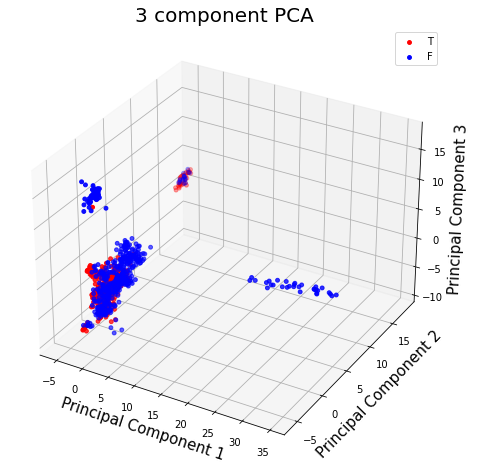

In [117]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
functionalities = ['T', 'F']
colors = ['r', 'b']
for functionality_art1, color in zip(functionalities,colors):
    indicesToKeep = finalDf_art1['functionality'] == functionality_art1
    ax.scatter(finalDf_art1.loc[indicesToKeep, 'principal component 1']
               , finalDf_art1.loc[indicesToKeep, 'principal component 2']
               , finalDf_art1.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 15)
ax.legend(functionalities)
ax.grid()

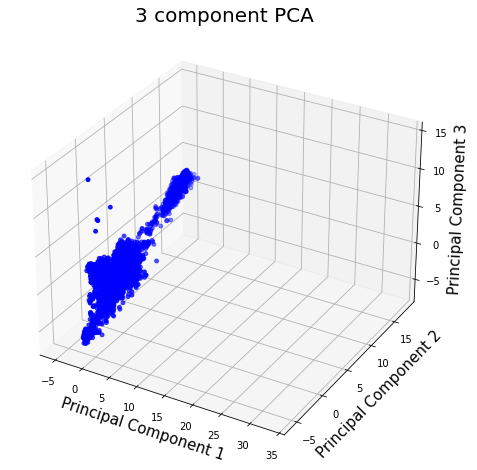

In [119]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.axis(xmin=-7,xmax=35)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
#functionalities = ['T', 'F']
#colors = ['r', 'b']
#for functionality_a, color in zip(functionalities,colors):
#    indicesToKeep = finalDf_art1['functionality'] == functionality_art1
ax.scatter(finalDf_nat_no1['principal component 1']
               , finalDf_nat_no1['principal component 2']
               , finalDf_nat_no1['principal component 3']
               , c = 'b'
               , s = 15)
#ax.legend(functionalities)
ax.grid()